<a href="https://colab.research.google.com/github/AliffiaHumrh/DIF62130_B_24-25_2311531004_Aliffia-Humairah/blob/main/Praktikum5/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


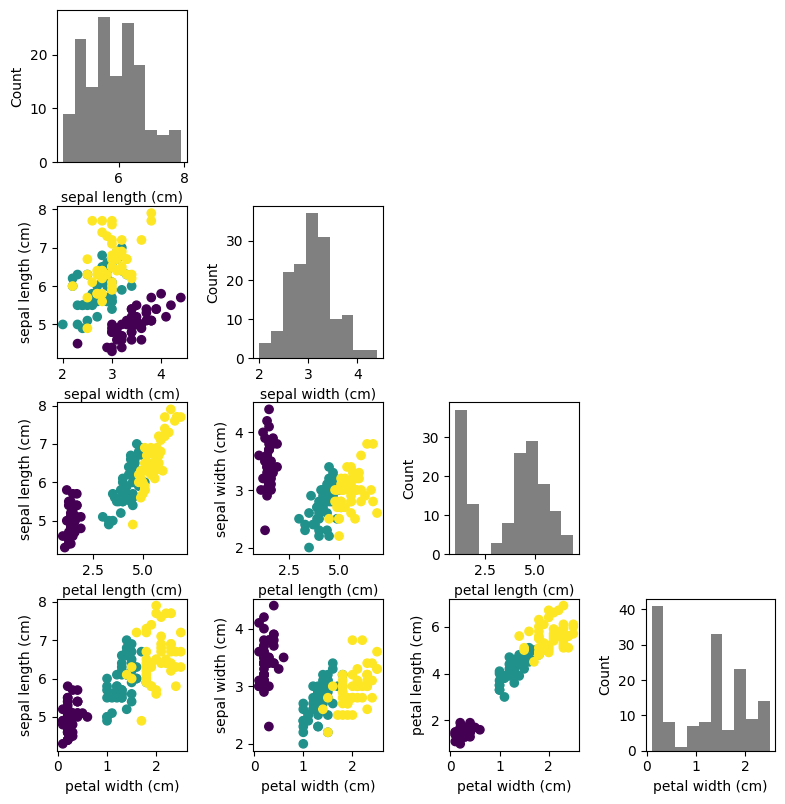

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize=(8, 8))
fig.tight_layout()

names = iris.feature_names

for i, j in zip(*np.triu_indices_from(ax, k=1)):
    ax[j, i].scatter(X[:, j], X[:, i], c = y)
    ax[j, i].set_xlabel(names[j])
    ax[j, i].set_ylabel(names[i])
    ax[i, j].set_axis_off()

for i in range(n_features):
    ax[i, i].hist(X[:, i], color='grey')
    ax[i, i].set_ylabel('Count')
    ax[i, i].set_xlabel(names[i])

In [8]:
def mean(x): # np.mean(X, axis = 0)
    return sum(x)/len(x)

def std(x): # np.std(x, axis = 0)
    return (sum([(i - mean(x))*2 for i in x])/len(x))*0.5

def Standardize_data(X):
    return (X - mean(X))/std(X)

X_std = Standardize_data(X)

In [10]:
print(X)
print(X_std)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [12]:
def covariance(x):
    return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_std) # np.cov(X_std.T)

In [14]:
cov_mat

array([[ 5.41757488e+29, -4.95723348e+28,  4.43841756e+29,
         1.02311233e+30],
       [-4.95723348e+28,  3.28157537e+29, -1.69770867e+29,
        -3.56426917e+29],
       [ 4.43841756e+29, -1.69770867e+29,  4.78479921e+29,
         1.13186926e+30],
       [ 1.02311233e+30, -3.56426917e+29,  1.13186926e+30,
         2.88800290e+30]])

In [16]:
from numpy.linalg import eig

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat)

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs @ np.diag(signs)
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [3.77028573e+30 3.24352429e+29 1.29144901e+29 1.26147887e+28]
Eigenvectors 
 [[ 0.3258659  -0.11214649  0.34932169  0.87132596]
 [ 0.43751036  0.89768219 -0.04218603 -0.03117238]
 [ 0.77753535 -0.3827857   0.2411769  -0.4367466 ]
 [-0.31278568  0.18725641  0.90444922 -0.22152146]]


In [19]:
# We First make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For your confirmation
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(np.float64(3.7702857259141706e+30), array([ 0.3258659 , -0.11214649,  0.34932169,  0.87132596])), (np.float64(3.243524288778495e+29), array([ 0.43751036,  0.89768219, -0.04218603, -0.03117238])), (np.float64(1.2914490088339642e+29), array([ 0.77753535, -0.3827857 ,  0.2411769 , -0.4367466 ])), (np.float64(1.261478865339787e+28), array([-0.31278568,  0.18725641,  0.90444922, -0.22152146]))]


In [21]:
# Select top k eigenvectors
k = 2
W = eig_vecs_sorted[:k, :] # Projection matrix

print(W.shape)

(2, 4)


Explained variance: [89.    7.66  3.05  0.3 ]
Cumulative explained variance: [ 89.    96.66  99.71 100.01]


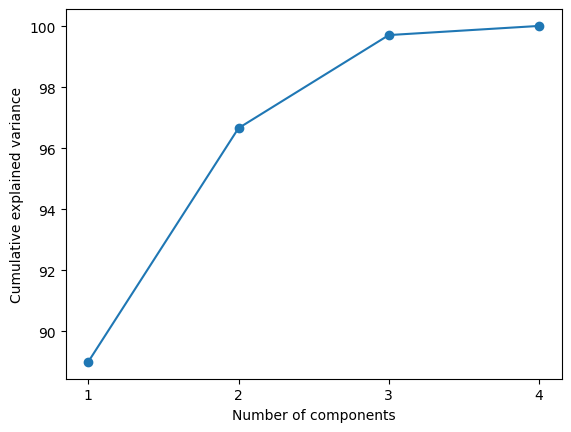

In [23]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

In [25]:
X_proj = X_std.dot(W.T)

print(X_proj.shape) # Dimensi data hasil transformasi
print(X.shape)      # Dimensi data awal

(150, 2)
(150, 4)


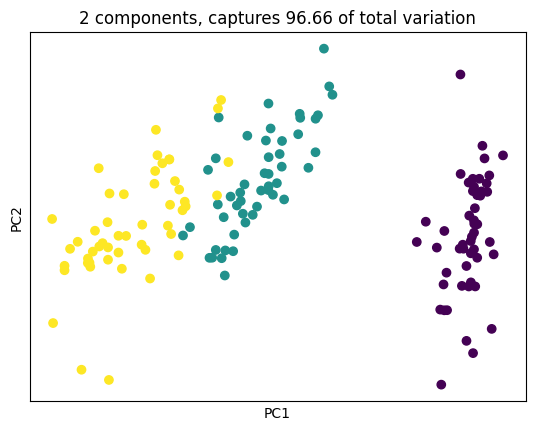

In [27]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(cum_explained_variance[1]))
plt.show()

Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio:
 [0.72962445 0.22850762]
Cumulative explained variance:
 [0.72962445 0.95813207]
Transformed data shape: (150, 2)


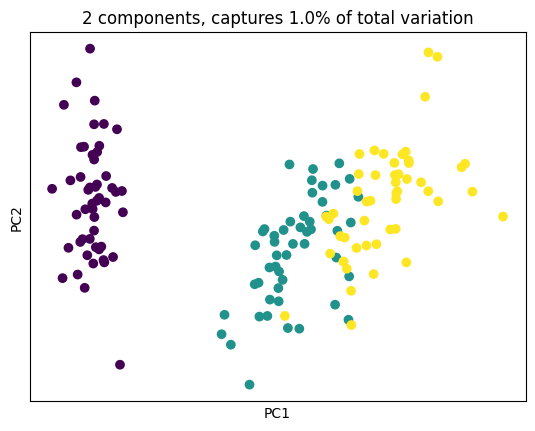

In [29]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round()))
plt.show()

# **PCA With Scikit-Learn**